### _Imports_

In [44]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model  import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import functions as fn # importing pre-defined functions from .py file (inside notebooks folder)

### Upload diamonds train data from csv

In [2]:
diamonds_train = pd.read_csv('../data/diamonds_train.csv')
diamonds_train.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


**Remark**: For the diamonds dataset, we have conducted an exploratory data analysis (EDA) in advance. Find references [here](https://github.com/Kristinawk/EDA_Diamonds).  
  
This dataset doesn't have nulls, therefore we can proceed directly with encoding.

## 1. Encoding

### Categorical variables overview

In [5]:
cat_var_lst = ["city", "cut", "color", "clarity"]
#cat_var_overview = fn.cat_var(diamonds_train, cat_var_lst)
#cat_var_overview

### One hot encoding

In [6]:
baseline_train = fn.one_hot_encod(diamonds_train, cat_var_lst)

In [8]:
#baseline_train.head()

Checking that all features are numeric

In [9]:
#baseline_train.info()

## 2. Features selection and engineering

In this phase we will not apply any changes to the features.

### Save pre-processing to csv

In [10]:
#baseline_train.to_csv('../data/baseline_train.csv', index=False)

## 3. Model selection

In [11]:
y = baseline_train['price'].astype('float64').to_numpy()
X = baseline_train[[col for col in baseline_train.columns if col != 'price']].to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
#print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

## 3. a) ElasticNet

In [13]:
model_elasticnet = ElasticNet()

fn.cross_val(model_elasticnet, X, y)

Cross val. scores: [-1833.64390701 -1937.89311616 -1838.94606472 -1834.4722746
 -1803.07991273] 

Mean of scores: 1849.6070550429442 



## 3. b) SVR

In [16]:
model_svr = SVR()

fn.cross_val(model_svr, X, y)

Cross val. scores: [-4208.27630307 -4349.59084525 -4258.49970513 -4225.98461454
 -4222.88255361] 

Mean of scores: 4253.046804323332 



## 3. c) Ridge

In [17]:
model_ridge = Ridge()

fn.cross_val(model_ridge, X, y)

Cross val. scores: [-1162.37097317 -1236.84771998 -1181.36659532 -1123.77678443
 -1086.81019334] 

Mean of scores: 1158.2344532457496 



## 3. d) Decision Tree Regressor

In [20]:
model_decisiontree = DecisionTreeRegressor()

fn.cross_val(model_decisiontree, X, y)

Cross val. scores: [-877.62931559 -872.70115246 -907.36536323 -858.23774212 -845.13098535] 

Mean of scores: 872.2129117503431 



## 3. e) RandomForestRegressor

In [48]:
model_randomforest = RandomForestRegressor()

fn.cross_val(model_randomforest, X, y)

Cross val. scores: [-654.95224026 -662.57559913 -670.01148258 -665.67893135 -651.56808185] 

Mean of scores: 660.9572670347252 



## 3. f) GradientBoostingRegressor

In [23]:
model_gradientboosting = GradientBoostingRegressor()

fn.cross_val(model_gradientboosting, X, y)

Cross val. scores: [-879.59064277 -856.04185565 -889.98164808 -869.74512933 -827.06412632] 

Mean of scores: 864.484680430803 



## 3. g) ExtraTreesRegressor

In [26]:
model_extratrees = ExtraTreesRegressor()

fn.cross_val(model_extratrees, X, y)

Cross val. scores: [-613.81259552 -619.0077115  -614.08969898 -620.04012503 -598.93489935] 

Mean of scores: 613.1770060765838 



## 3. h) BaggingRegressor

In [28]:
model_bagging = BaggingRegressor()

fn.cross_val(model_bagging, X, y)

Cross val. scores: [-691.21925102 -708.19306603 -713.79584737 -700.17574779 -678.97964718] 

Mean of scores: 698.4727118796867 



## 3. i) StackingRegressor

In [71]:
# Define base models
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=200, 
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features=None)),
    ('gb', GradientBoostingRegressor(n_estimators=100)),
    ('lr', ExtraTreesRegressor(n_estimators=100,
                                max_depth=None,
                                min_samples_split=6,
                                min_samples_leaf=2,
                                max_features=None))
]

# Define meta-model (Ridge regression)
meta_model = Ridge()


In [72]:
# Create the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

In [73]:
fn.cross_val(stacking_regressor, X, y)

Cross val. scores: [-607.8681021  -609.29158779 -606.36620059 -611.78507187 -595.76157962] 

Mean of scores: 606.2145083949684 



## 3. j) AdaBoostRegressor

In [31]:
model_adaboost = AdaBoostRegressor()

fn.cross_val(model_adaboost, X, y)

Cross val. scores: [-1599.44833947 -1511.38562057 -1520.56161739 -1555.29603015
 -1547.01533228] 

Mean of scores: 1546.7413879698531 



**CONCLUSION**: at this stage the two models that perform the best are RandomForestRegressor and ExtraTreesRegressor. We can improve these models with grid search.

### Grid Search: RandomForestRegressor

In [45]:
param_grid = {'n_estimators': [100, 200, 300],  # Number of trees in the forest.
              'max_depth': [None, 3, 10],  # Maximum depth of the trees.
              'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node.
              'min_samples_leaf': [1, 4],  # Minimum number of samples required to be at a leaf node.
              'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split.
              }

In [49]:
grid_search = GridSearchCV(model_randomforest,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [50]:
grid_search.fit(X, y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 

Best score:  659.2117645213639 



### Grid Search: ExtraTreesRegressor

In [62]:
param_grid = {'n_estimators': [100],  # Number of trees in the forest.
              'max_depth': [None],  # Maximum depth of the trees.
              'min_samples_split': [6],  # Minimum number of samples required to split an internal node.
              'min_samples_leaf': [2],  # Minimum number of samples required to be at a leaf node.
              'max_features': [None]  # Number of features to consider when looking for the best split.
              }

In [63]:
grid_search = GridSearchCV(model_extratrees,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [64]:
grid_search.fit(X, y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Best hyperparameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100} 

Best score:  606.4497365477694 



### Fit Model

In [74]:
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_test)

### Visual check

In [75]:
check = pd.DataFrame({'Ground truth': y_test, 'Predictions': y_pred, 'Diff': y_test - y_pred})
check

,Ground truth,Predictions,Diff
0,2970.0,2742.281312,227.718688
1,3004.0,2339.946989,664.053011
2,838.0,882.293572,-44.293572
3,6468.0,6333.090583,134.909417
4,633.0,623.286763,9.713237
...,...,...,...
8086,4764.0,4926.863456,-162.863456
8087,756.0,717.777113,38.222887
8088,2690.0,3065.981424,-375.981424
8089,3992.0,4050.810227,-58.810227


In [76]:
check.reset_index(inplace=True)

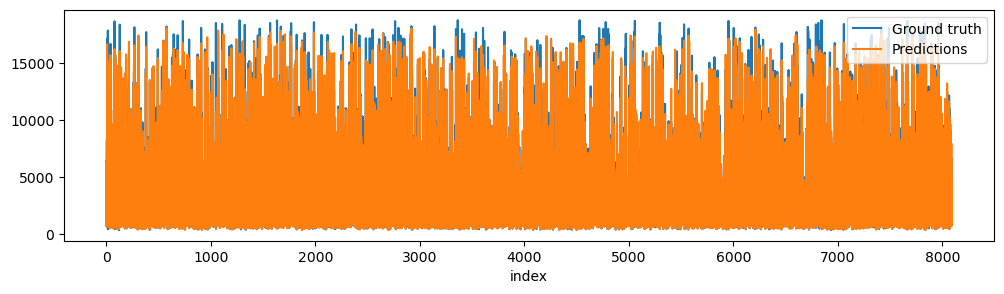

In [77]:
check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(12, 3));

# 4. Predictions

### Upload diamonds test data from csv

In [78]:
diamonds_test = pd.read_csv('../data/diamonds_test.csv')
#diamonds_test.head()

### One-hot-encoding

In [79]:
baseline_test = fn.one_hot_encod(diamonds_test, cat_var_lst)

In [80]:
baseline_test = baseline_test.drop('id', axis=1)

In [81]:
#baseline_test.head()

### Predict: ExtraTreesRegressor

In [82]:
stacking_regressor_pred = stacking_regressor.predict(baseline_test)

C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [83]:
stacking_regressor_pred

array([2961.79989822, 5375.9453257 , 9387.03910327, ..., 2969.58015677,
       2169.23680917,  838.07348773])

### Save

In [84]:
fn.save_pred(diamonds_test, stacking_regressor_pred, 'encod01_featu00_model01_vis')

'file saved succesfully'